Instalación de librerías

In [1]:
!pip install opencv-python matplotlib --quiet

import cv2
import numpy as np
import matplotlib.pyplot as plt

# Para que las imágenes se vean en colores correctos en matplotlib
def show(img, title='', cmap=None):
    plt.figure(figsize=(6,4))
    plt.imshow(img, cmap=cmap)
    plt.title(title)
    plt.axis('off')


Descarga de la imagen desde github

In [2]:
import urllib.request
import cv2

url = "https://github.com/JuanCruzMonteros/Vision-Computacional/blob/main/Tp2/entregable/desierto.jpg?raw=true"
urllib.request.urlretrieve(url, 'desierto.jpg')

img = cv2.imread('desierto.jpg')
# OpenCV lee en formato BGR, lo convertimos a RGB para visualizar correctamente con matplotlib
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

Conversión de la imágen original a escala de grises

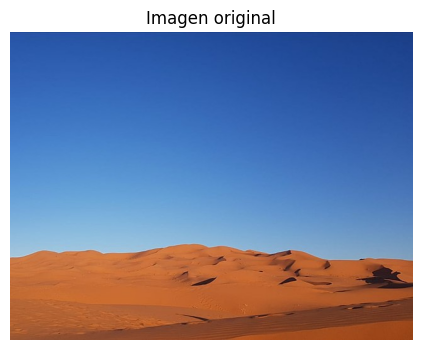

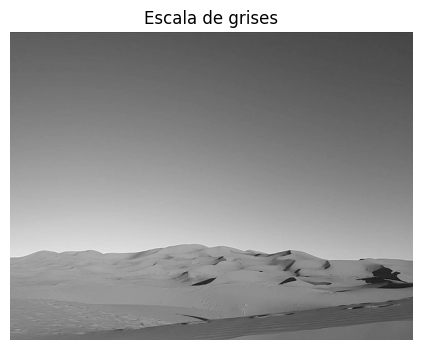

In [3]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

show(img_rgb, 'Imagen original')
show(gray, 'Escala de grises', cmap='gray')

Se multiplica la imagen en escala de grises por los factores pedidos(0.5, 2, 3) y se muestra el histograma de cada uno

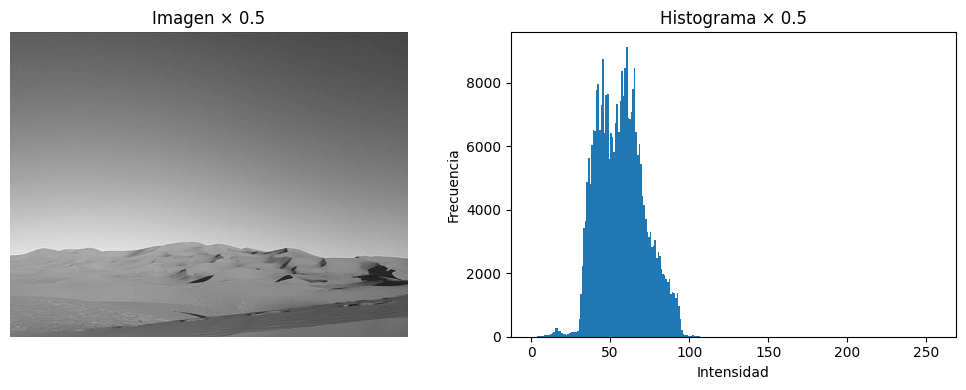

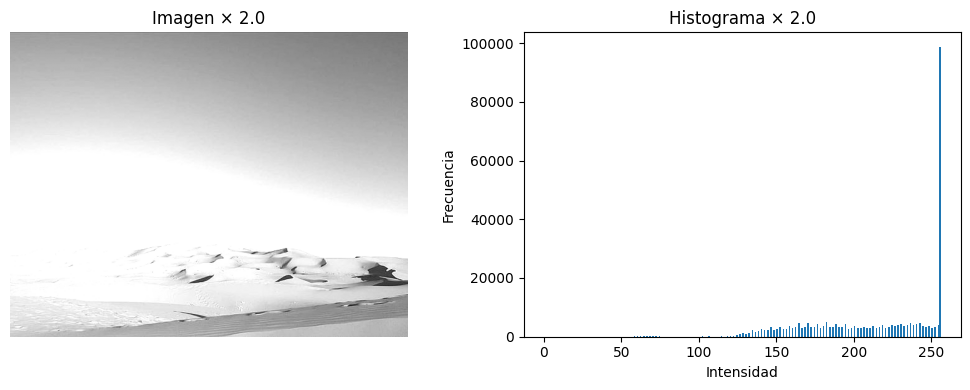

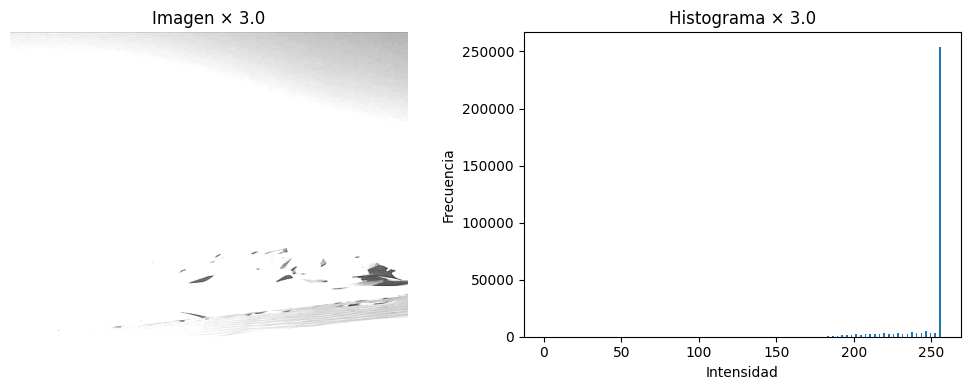

In [4]:
factors = [0.5, 2.0, 3.0]

for f in factors:
    img_mult = np.clip(gray * f, 0, 255).astype(np.uint8)

    fig, axes = plt.subplots(1, 2, figsize=(10,4))

    # Imagen
    axes[0].imshow(img_mult, cmap='gray')
    axes[0].set_title(f'Imagen × {f}')
    axes[0].axis('off')

    # Histograma
    axes[1].hist(img_mult.ravel(), bins=256, range=[0,256])
    axes[1].set_title(f'Histograma × {f}')
    axes[1].set_xlabel('Intensidad')
    axes[1].set_ylabel('Frecuencia')

    plt.tight_layout()
    plt.show()


Se descarga nueva imagen elegida desde github para utilizarla mediante la Transformada de Hough

In [5]:
import urllib.request
import cv2

url = "https://github.com/JuanCruzMonteros/Vision-Computacional/blob/main/Tp2/entregable/imagen%20elegida.jpg?raw=true"
urllib.request.urlretrieve(url, 'imagen_elegida.jpg')

img = cv2.imread('imagen_elegida.jpg')
# OpenCV lee en BGR, lo convertimos a RGB para visualizar correctamente con matplotlib
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

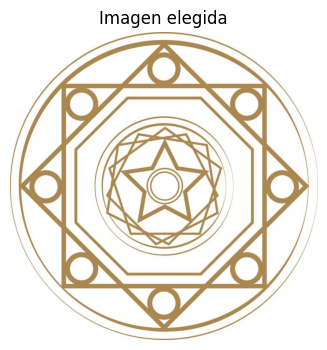

In [7]:
show(img_rgb, 'Imagen elegida')

Se utiliza el algoritmo de la transformada de Hough para detectar lineas

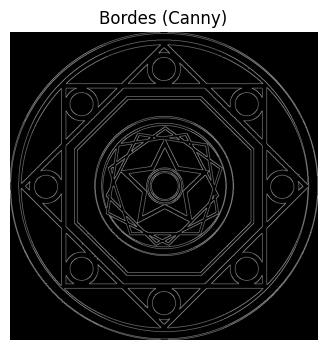

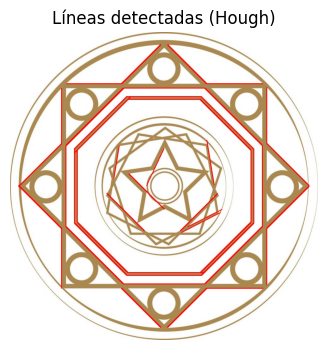

In [8]:
edges = cv2.Canny(gray, 50, 150, apertureSize=3)
lines = cv2.HoughLinesP(edges, rho=1, theta=np.pi/180,
                        threshold=100, minLineLength=100, maxLineGap=10)

img_lines = img_rgb.copy()
if lines is not None:
    lines = lines.reshape(-1, 4)  # evita error de desempacado
    for x1, y1, x2, y2 in lines:
        cv2.line(img_lines, (x1, y1), (x2, y2), (255, 0, 0), 2)

show(edges, 'Bordes (Canny)', cmap='gray')
show(img_lines, 'Líneas detectadas (Hough)')


Se utiliza el algoritmo de la transformada de Hough para detectar circulos

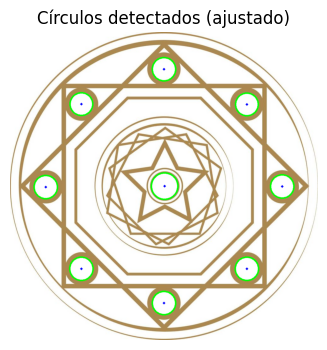

In [34]:
circles = cv2.HoughCircles(
    gray,
    cv2.HOUGH_GRADIENT,
    dp=1.2,           # menos sensible que 1.2
    minDist=50,       # distancia mínima entre centros
    param1=100,       # Canny interno
    param2=60,        # umbral de detección: subirlo reduce falsos positivos
    minRadius=20,     # radio mínimo a buscar
    maxRadius=80      # radio máximo a busca
)

img_circles = img_rgb.copy()
if circles is not None:
    circles = np.round(circles[0, :]).astype("int")
    for (x, y, r) in circles:
        cv2.circle(img_circles, (x, y), r, (0, 255, 0), 3)
        cv2.circle(img_circles, (x, y), 2, (0, 0, 255), 3)

show(img_circles, 'Círculos detectados (ajustado)')

